In [152]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import random
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

clinical_trial_data_to_load


'data/clinicaltrial_data.csv'

In [123]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_df,mouse_df,
                                 how='outer', on='Mouse ID')


# Display the data table for preview
combined_df.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [3]:
combined_df["Mouse ID"].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [4]:
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [91]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df=combined_df.groupby(['Drug','Timepoint'])
# Convert to DataFrame

# Preview DataFrame
group_df.count()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23
...                       ...                 ...               ...
Zoniferol 25               16                  16                16
          30               15                  15                15
          35               14                  14                14
          40               14                  14                14
          45               14                  14                14

[100 rows x 3 columns]

In [6]:
tumorv_t_drug_group_df = group_df["Tumor Volume (mm3)"].mean()
tumorv_t_drug_group_df.to_frame()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [68]:
tumorv_t_drug_group_df.head(50)

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [89]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_tumorv_t_drug_group_df = group_df["Tumor Volume (mm3)"].sem()
error_tumorv_t_drug_group_df.to_frame()
# Convert to DataFrame

# Preview DataFrame
error_tumorv_t_drug_group_df.to_frame()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [61]:
error_tumorv_t_drug_group_df.to_frame().rename(columns={'Tumor Volume (mm3)':"Tumor Volume Standard Error"})

Tumor Volume Standard Error
Drug      Timepoint                             
Capomulin 0                             0.000000
          5                             0.448593
          10                            0.702684
          15                            0.838617
          20                            0.909731
...                                          ...
Zoniferol 25                            0.602513
          30                            0.800043
          35                            0.881426
          40                            0.998515
          45                            1.003576

[100 rows x 1 columns]

In [24]:
error_tumorv_t_drug_group_df.loc["Capomulin"].values

array([0.        , 0.44859285, 0.70268437, 0.83861725, 0.90973069,
       0.88164215, 0.93445951, 1.05224089, 1.22360839, 1.22397745])

In [67]:
error_tumorv_t_drug_group_df.loc["Capomulin"].values

array([0.        , 0.44859285, 0.70268437, 0.83861725, 0.90973069,
       0.88164215, 0.93445951, 1.05224089, 1.22360839, 1.22397745])

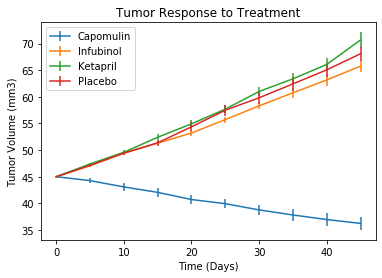

In [86]:
# Plot the world average as a line chart (, does argument unpacking)
plt.errorbar(error_tumorv_t_drug_group_df.loc["Capomulin"].index,
             y=tumorv_t_drug_group_df.loc["Capomulin"].values,
             yerr=error_tumorv_t_drug_group_df.loc["Capomulin"].values,
             label="Capomulin")


plt.errorbar(error_tumorv_t_drug_group_df.loc["Infubinol"].index,
             y=tumorv_t_drug_group_df.loc["Infubinol"].values,
             yerr=error_tumorv_t_drug_group_df.loc["Infubinol"].values,
             label="Infubinol")


plt.errorbar(error_tumorv_t_drug_group_df.loc["Ketapril"].index,
             y=tumorv_t_drug_group_df.loc["Ketapril"].values,
             yerr=error_tumorv_t_drug_group_df.loc["Ketapril"].values,
             label="Ketapril")


plt.errorbar(error_tumorv_t_drug_group_df.loc["Placebo"].index,
             y=tumorv_t_drug_group_df.loc["Placebo"].values,
             yerr=error_tumorv_t_drug_group_df.loc["Placebo"].values,
             label="Placebo")

# Plot the unemployment values for a single country
#country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(loc='upper left')

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()

In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [87]:
# Generate the Plot (with Error Bars)

# Save the Figure
plt.savefig("../Images/Tumor Response to Treatment.png")

<Figure size 432x288 with 0 Axes>

In [11]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [93]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_df = group_df["Metastatic Sites"].mean()

# Convert to DataFrame
met_sites_df.to_frame()
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [114]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_err_df = group_df["Metastatic Sites"].sem()
# Convert to DataFrame
met_sites_err_df=met_sites_err_df.to_frame()

# Preview DataFrame
met_sites_err_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


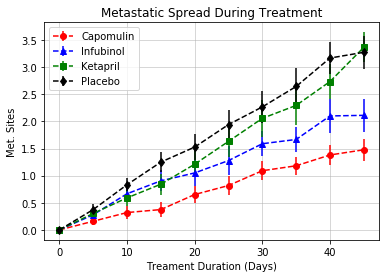

In [158]:
plt.errorbar(met_sites_df.loc["Capomulin"].index,
             y=met_sites_df.loc["Capomulin"].values,
             yerr=met_sites_err_df.loc["Capomulin"].values,
             marker ='o', color='red',
             linestyle = "--",
             label="Capomulin")


plt.errorbar(met_sites_df.loc["Infubinol"].index,
             y=met_sites_df.loc["Infubinol"].values,
             yerr=met_sites_err_df.loc["Infubinol"].values,
             marker ='^', color='blue',
             linestyle = "--",
             label="Infubinol")


plt.errorbar(met_sites_df.loc["Ketapril"].index,
             y=met_sites_df.loc["Ketapril"].values,
             yerr=met_sites_err_df.loc["Ketapril"].values,
             marker ='s', color='green',
             linestyle = "--",
             label="Ketapril")


plt.errorbar(met_sites_df.loc["Placebo"].index,
             y=met_sites_df.loc["Placebo"].values,
             yerr=met_sites_err_df.loc["Placebo"].values,
             marker ='d', color='black',
             linestyle = "--",
             label="Placebo")

# Create a legend for our chart
plt.legend(loc='upper left')

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treament Duration (Days)")
plt.ylabel("Met. Sites")

plt.grid(linestyle='-', linewidth=0.5)

# Show the chart
plt.show()

In [97]:
plt.savefig("../Images/Met spread.png")

<Figure size 432x288 with 0 Axes>

In [129]:
met_sites_df.loc["Placebo"].values

array([0.        , 0.375     , 0.83333333, 1.25      , 1.52631579,
       1.94117647, 2.26666667, 2.64285714, 3.16666667, 3.27272727])

In [15]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [130]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_df = group_df["Mouse ID"].count()

# Convert to DataFrame
mouse_df = mouse_df.to_frame()
# Preview DataFrame
mouse_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [131]:
mouse_df.head(100)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [138]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
mouse_df.loc["Capomulin"].values[0]

array([25])

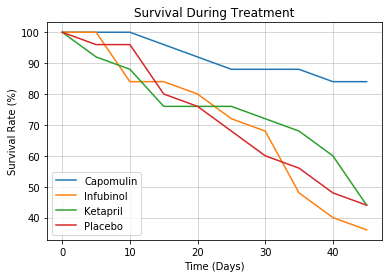

In [159]:
plt.errorbar(mouse_df.loc["Capomulin"].index,
             y=mouse_df.loc["Capomulin"]/mouse_df.loc["Capomulin"].values[0]*100,
             label="Capomulin")

plt.errorbar(mouse_df.loc["Infubinol"].index,
             y=mouse_df.loc["Infubinol"].values/mouse_df.loc["Infubinol"].values[0]*100,
             label="Infubinol")


plt.errorbar(mouse_df.loc["Ketapril"].index,
             y=mouse_df.loc["Ketapril"].values/mouse_df.loc["Ketapril"].values[0]*100,
             label="Ketapril")


plt.errorbar(mouse_df.loc["Placebo"].index,
             y=mouse_df.loc["Placebo"].values/mouse_df.loc["Placebo"].values[0]*100,
             label="Placebo")

# Create a legend for our chart
plt.legend(loc='bottom left')

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")


plt.grid(linestyle='-', linewidth=0.5)

# Show the chart
plt.show()

In [18]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [38]:
# Calculate the percent changes for each drug
percent_change_capomulin= 100*(tumorv_t_drug_group_df.loc["Capomulin"].values[-1]-tumorv_t_drug_group_df.loc["Capomulin"].values[0])/tumorv_t_drug_group_df.loc["Capomulin"].values[0]
# Display the data to confirm
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
percent_changes=[]

for drug in drugs:
    percent_changes.append(100*(tumorv_t_drug_group_df.loc[drug].values[-1]-tumorv_t_drug_group_df.loc[drug].values[0])/tumorv_t_drug_group_df.loc[drug].values[0])

In [44]:
my_new_list=[(100*(tumorv_t_drug_group_df.loc[drug].values[-1]-tumorv_t_drug_group_df.loc[drug].values[0])/tumorv_t_drug_group_df.loc[drug].values[0]) for drug in drugs]

In [46]:
def get_percent_change(df,drug):
    return 100 * (df.loc[drug].values[-1] - df.loc[drug].values[0])/df.loc[drug].values[0]

In [48]:
[get_percent_change(tumorv_t_drug_group_df,drug) for drug in drugs]

[-19.47530266789416, 46.123471727851836, 57.02879468660604, 51.29796048315153]

Text(0, 0.5, '% Tumor Change')

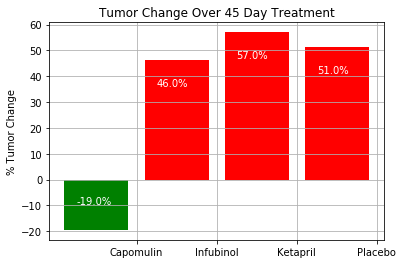

In [250]:
#plt.bar(x=drugs,height=percent_changes)

fig, ax = plt.subplots()
plt.grid()

survival_df = pd.DataFrame({
    'drugs': drugs,
    'percent changes': percent_changes
})

survival_df.set_index('drugs')


t1 = survival_df[survival_df['percent changes']<0]
t2 = survival_df[survival_df['percent changes']>=0]
plt.bar(t1.index, t1['percent changes'], color='g')
plt.bar(t2.index, t2['percent changes'], color='r')

idx = np.asarray([i for i in range(len(drugs))])

ax.set_xticks(idx+0.5)
ax.set_xticklabels(drugs)

for i, v in enumerate(percent_changes):
    if v < 0:
        plt.text(i-0.25, v + 10, str(round(v))+'%',color="white")
    else:
        plt.text(i-0.25, v - 10, str(round(v))+'%',color="white")
    


plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Change")
    
    

In [20]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)